In [2]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
from chart_studio.plotly import plot, iplot
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from panel.interact import interact
from panel import widgets

import os
import requests
import pandas as pd
import json

from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from poloniex import Poloniex
import time
from datetime import datetime, timezone
import numpy as np
from pathlib import Path
import seaborn as sns
import warnings 
from sklearn.linear_model import LinearRegression
import time

warnings.filterwarnings("ignore")
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [102]:
url = "https://api.covid19api.com/world?from=2020-04-14T00:00:00Z&to=2020-04-17T00:00:00Z"

payload = {}
headers= {}

response = requests.request("GET", url, headers=headers, data = payload)

#print(response.text.encode('utf8'))

In [103]:
response.json()

[{'NewConfirmed': 65889,
  'TotalConfirmed': 1826633,
  'NewDeaths': 4672,
  'TotalDeaths': 108114,
  'NewRecovered': 27255,
  'TotalRecovered': 447732},
 {'NewConfirmed': 62833,
  'TotalConfirmed': 1837869,
  'NewDeaths': 5665,
  'TotalDeaths': 110071,
  'NewRecovered': 24489,
  'TotalRecovered': 444024},
 {'NewConfirmed': 82289,
  'TotalConfirmed': 2054826,
  'NewDeaths': 8266,
  'TotalDeaths': 134152,
  'NewRecovered': 36758,
  'TotalRecovered': 510380}]

In [37]:
res = response.json()
res[0]["Month"] = "04"
res

[{'NewConfirmed': 65889,
  'TotalConfirmed': 1826633,
  'NewDeaths': 4672,
  'TotalDeaths': 108114,
  'NewRecovered': 27255,
  'TotalRecovered': 447732,
  'Month': '04'}]

In [75]:
months = ["04","05","06","07","08","09","10","11"]
days = ["01","02","03","04","05","06","07","08","09",
        "10","11","12","13","14","15","16","17","18","19",
        "20","21","22","23","24","25","26","27","28","29",
        "30","31"]

def retrieve_individual_data(mon,da):
    cur_month = mon
    i = 0
    j = 0
    data = []
    payload = {}
    headers= {}
    
    while i < len(cur_month):
        
        current_month = cur_month[i]
        cur_days = da
        
        if current_month == "04":
            new_days = cur_days[14:29]
        elif current_month == "05":
            new_days = cur_days[0:30]
        elif current_month == "06":
            new_days = cur_days[0:29]
        elif current_month == "07":
            new_days = cur_days[0:30]
        elif current_month == "08":
            new_days = cur_days[0:30]
        elif current_month == "09":
            new_days = cur_days[0:29]
        elif current_month == "10":
            new_days = cur_days[0:30]
        elif current_month == "11":
            new_days = cur_days[0:10]
            
        
        while j < len(new_days):
            
            next_day = int(new_days[j])+1
            if next_day < 10:
                next_day = f"0{next_day}"
            else:
                next_day = next_day
            
            url = f"https://api.covid19api.com/world?from=2020-{cur_month[i]}-{new_days[j]}T00:00:00Z&to=2020-{cur_month[i]}-{next_day}T00:00:00Z"

            response = requests.request("GET", url, headers=headers, data = payload)
            
            res = response.json()
            
            res[0]["Month"] = f"{cur_month[i]}"
            res[0]["Day"] = f"{new_days[j]}"#-{next_day}"
            res[0]["Year"] = f"2020"
            
            data.append(res)
            
            #print(f"months = {current_month}")
            #print(f"days = {new_days[j]} - {next_day}")
            #print(response.json())
            time.sleep(1)
            j+=1
        
        j=0
        
        i+=1
    
    
    return data

individual_day = retrieve_individual_data(months,days)

In [76]:
data_individual = []
i = 0
while i < len(individual_day):
    data_individual.append(individual_day[i][0])
    i+=1

In [94]:
coviddata = pd.DataFrame(data_individual)
coviddata.set_index(["Year","Month","Day"]).reset_index()
coviddata["Date"]= pd.to_datetime(coviddata[["Year","Month","Day"]])

In [97]:
coviddata.set_index(["Date","Year","Month","Day"]).reset_index().head(5)

,Date,Year,Month,Day,NewConfirmed,NewDeaths,NewRecovered,TotalConfirmed,TotalDeaths,TotalRecovered
0,2020-04-15,2020,04,15,62833,5665,24489,1837869,110071,444024
1,2020-04-16,2020,04,16,82289,8266,36758,2054826,134152,510380
2,2020-04-17,2020,04,17,96444,9619,31084,2150422,143754,541299
3,2020-04-18,2020,04,18,87137,8726,27085,2155152,149156,490147
4,2020-04-19,2020,04,19,77532,5686,23974,2316388,159478,591653


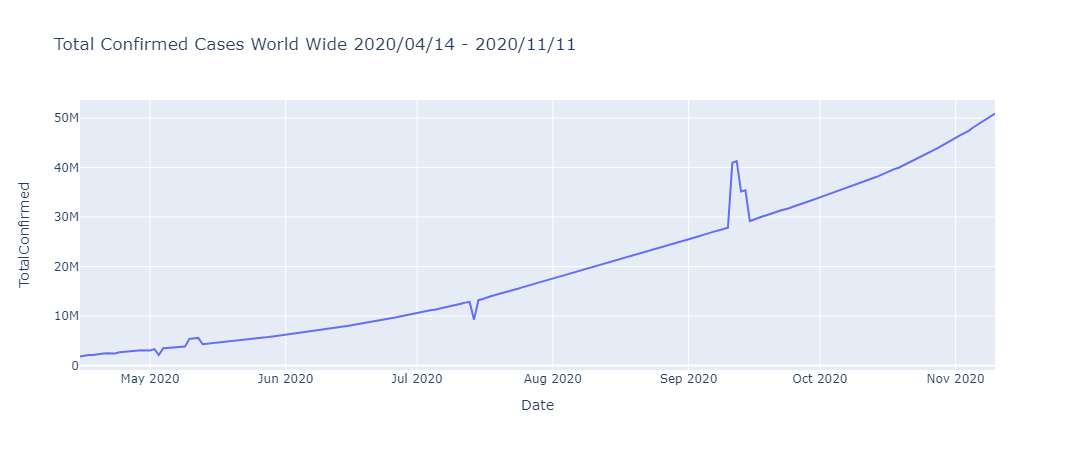

In [100]:
px.line(coviddata,
        x="Date",
        y="TotalConfirmed",title = "Total Confirmed Cases World Wide 2020/04/14 - 2020/11/11")

In [51]:
#country_url = f"https://api.covid19api.com/dayone/country/{country_name_slug[2]}"
#country_response = requests.request("GET", country_url, headers=headers, data = payload)
#print(country_url)
#country_response.json()
#while i < len(country_name_slug):
    